# Model Exercises
Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

import os
import acquire
import prepare

In [85]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## 1. 
- What is your baseline prediction?
- What is your baseline accuracy?
Remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [30]:
titanic = acquire.get_titanic_data()
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [31]:
titanic.shape

(891, 13)

In [32]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [33]:
titanic.survived.mean()

0.3838383838383838

In [34]:
train, validate, test = prepare.prep_titanic_data(titanic)
train

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,0,1,36.000000,0,0,40.1250,1,1,0,0
165,1,3,9.000000,0,2,20.5250,0,1,0,1
50,0,3,7.000000,4,1,39.6875,0,1,0,1
259,1,2,50.000000,0,1,26.0000,0,0,0,1
306,1,1,29.678105,0,0,110.8833,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
313,0,3,28.000000,0,0,7.8958,1,1,0,1
636,0,3,32.000000,0,0,7.9250,1,1,0,1
222,0,3,51.000000,0,0,8.0500,1,1,0,1
485,0,3,29.678105,3,1,25.4667,0,0,0,1


In [35]:
validate

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
610,0,3,39.000000,1,5,31.2750,0,0,0,1
424,0,3,18.000000,1,1,20.2125,0,1,0,1
568,0,3,29.678105,0,0,7.2292,1,1,0,0
334,1,1,29.678105,1,0,133.6500,0,0,0,1
101,0,3,29.678105,0,0,7.8958,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
176,0,3,29.678105,3,1,25.4667,0,1,0,1
372,0,3,19.000000,0,0,8.0500,1,1,0,1
737,1,1,35.000000,0,0,512.3292,1,1,0,0
862,1,1,48.000000,0,0,25.9292,1,0,0,1


In [36]:
test

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
561,0,3,40.000000,0,0,7.8958,1,1,0,1
641,1,1,24.000000,0,0,69.3000,1,0,0,0
400,1,3,39.000000,0,0,7.9250,1,1,0,1
498,0,1,25.000000,1,2,151.5500,0,0,0,1
875,1,3,15.000000,0,0,7.2250,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
339,0,1,45.000000,0,0,35.5000,1,1,0,1
841,0,2,16.000000,0,0,10.5000,1,1,0,1
442,0,3,25.000000,1,0,7.7750,0,1,0,1
815,0,1,29.678105,0,0,0.0000,1,1,0,1


## 1. My baseline prediction: Most passengers did not survive.

In [12]:
# Finding out the mode of the most relevant feature

train.survived.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [103]:
# Determining the baseline as the mode of the dataset as seen above

train['baseline_prediction'] = 0
baseline_accuracy = (train.baseline_prediction == train.survived).mean()
print(f'The baseline accuracy is: {baseline_accuracy}')

The baseline accuracy is: 0.6164658634538153


## 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [13]:
# List of X_ and y_ for train, validate, and test

        # X_train = train.drop(columns=['survived'])
        # y_train = train.survived

        # X_validate = validate.drop(columns=['survived'])
        # y_validate = validate.survived

        # X_test = test.drop(columns=['survived'])
        # y_test = test.survived

In [108]:
# Creating the X & y version of train, where X is a DataFrame of all the features (columns)
# and y is a series with the target variable only (survived here).

X_train = train.drop(columns=['survived'])
y_train = train.survived
clf = DecisionTreeClassifier(max_depth=2, random_state=175)

clf = clf.fit(X_train, y_train)

### Decision tree visualization

In [21]:
clf.classes_

array([0, 1])

[Text(697.5, 906.0, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]\nclass = Did not survive'),
 Text(348.75, 543.6, 'pclass <= 2.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]\nclass = Survived'),
 Text(174.375, 181.19999999999993, 'gini = 0.081\nsamples = 94\nvalue = [4, 90]\nclass = Survived'),
 Text(523.125, 181.19999999999993, 'gini = 0.498\nsamples = 81\nvalue = [38, 43]\nclass = Survived'),
 Text(1046.25, 543.6, 'fare <= 18.275\ngini = 0.295\nsamples = 323\nvalue = [265, 58]\nclass = Did not survive'),
 Text(871.875, 181.19999999999993, 'gini = 0.184\nsamples = 205\nvalue = [184, 21]\nclass = Did not survive'),
 Text(1220.625, 181.19999999999993, 'gini = 0.43\nsamples = 118\nvalue = [81, 37]\nclass = Did not survive')]

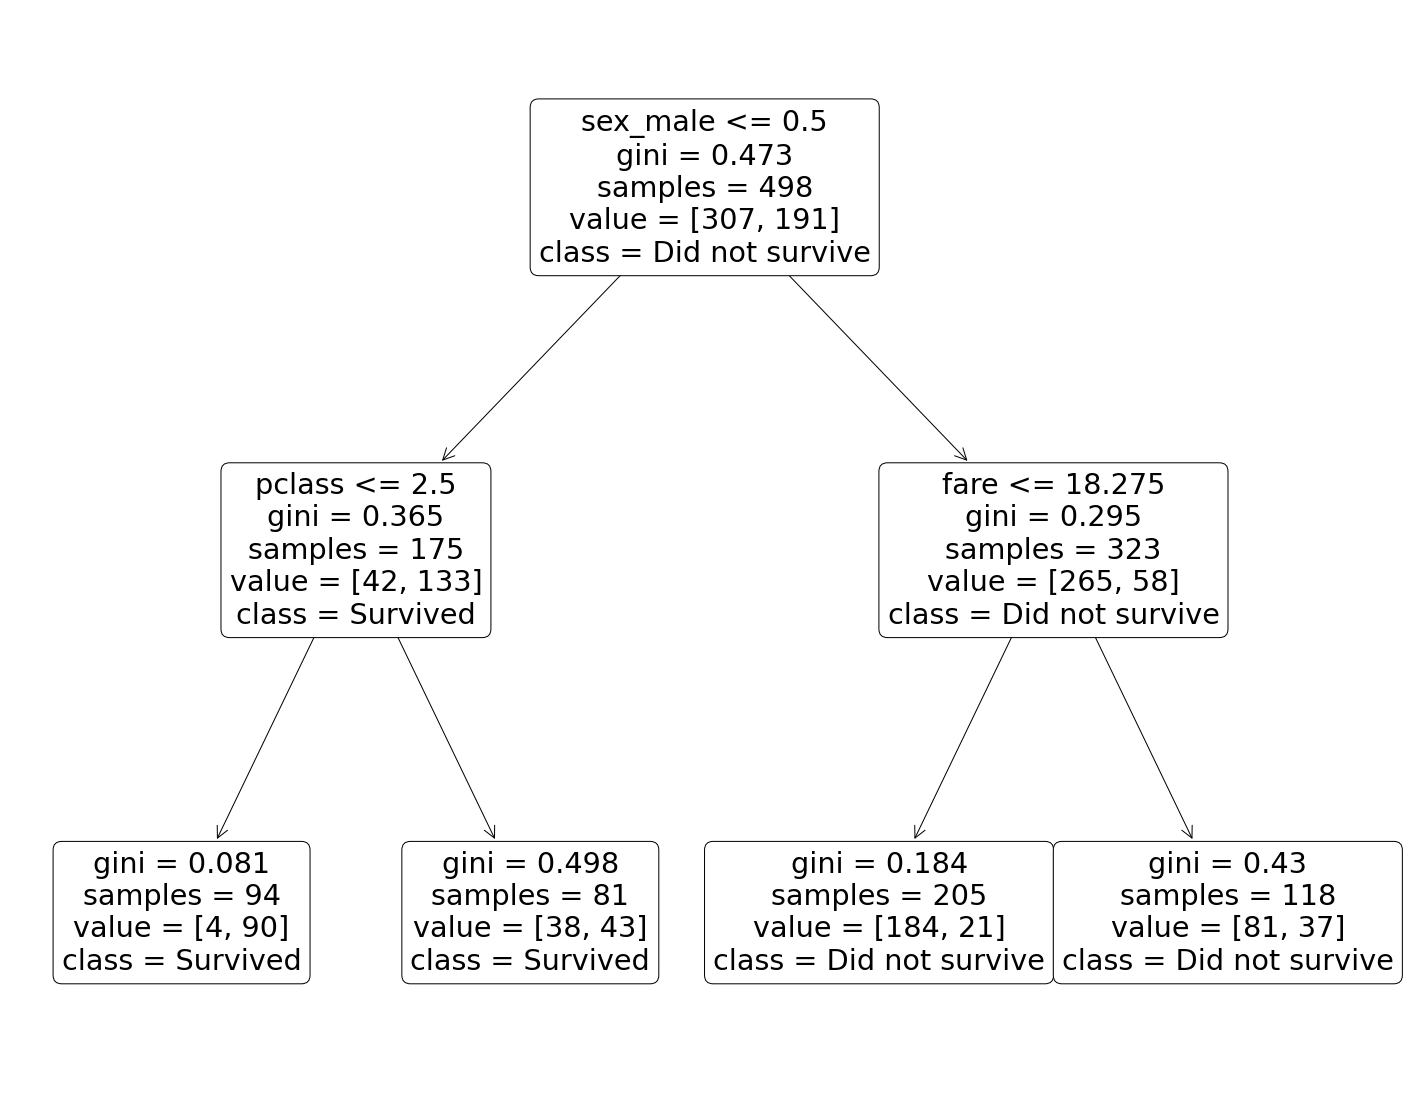

In [109]:
plt.figure(figsize=(25, 20))
plot_tree(clf, feature_names=X_train.columns, class_names=['Did not survive', 'Survived'], rounded=True)

## 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

### Prediction

In [110]:
y_pred = clf.predict(X_train)
y_pred[0:10]

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1])

### Probability

In [111]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:10]

array([[0.68644068, 0.31355932],
       [0.68644068, 0.31355932],
       [0.68644068, 0.31355932],
       [0.04255319, 0.95744681],
       [0.04255319, 0.95744681],
       [0.68644068, 0.31355932],
       [0.68644068, 0.31355932],
       [0.89756098, 0.10243902],
       [0.89756098, 0.10243902],
       [0.4691358 , 0.5308642 ]])

### Accuracy

In [112]:
format(clf.score(X_train, y_train))

'0.7991967871485943'

### Confusion matrix

In [113]:
confusion_matrix(y_train, y_pred)

array([[265,  42],
       [ 58, 133]])

### Classification report

In [114]:
pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1
0,265,42
1,58,133


In [42]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       307
           1       0.82      0.70      0.75       191

    accuracy                           0.83       498
   macro avg       0.82      0.80      0.81       498
weighted avg       0.82      0.83      0.82       498



In [119]:
# Printing a transposed version of the classification report
# taking actuals and predictions as a DataFrame

DecisionTree_report = classification_report(y_train, y_pred, output_dict=True)
pd.DataFrame(DecisionTree_report)

,0,1,accuracy,macro avg,weighted avg
precision,0.820433,0.760000,0.799197,0.790217,0.797255
recall,0.863192,0.696335,0.799197,0.779764,0.799197
f1-score,0.841270,0.726776,0.799197,0.784023,0.797358
support,307.000000,191.000000,0.799197,498.000000,498.000000


## 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [115]:
TP = 265
TN = 133
FP = 42
FN = 58

True_positive_rate = TP/TP+TN
True_negative_rate = TN/TN+FP
False_positive_rate = FP/FP+TN
False_negative_rate = FN/FN+TP

Precision = TP/(TP+FP)
Accuracy = (TP+TN)/(TP+TN+FP+FN)
Recall = TP/(TP+FN)
F1_score = 2 * (Precision*Recall)/(Precision*Recall)
Support_0 = TP + FN
Suppport_1 = FP + TN

print(f'True_positive_rate: {True_positive_rate}')
print(f'True_negative_rate: {True_negative_rate}')
print(f'False_positive_rate: {False_positive_rate}')
print(f'False_negative_rate: {False_negative_rate}\n')
print('============================\n')
print(f'Precision: {Precision}')
print(f'Accuracy: {Accuracy}')
print(f'Recall: {Recall}')
print(f'F1_score: {F1_score}')
print(f'Support_0: {Support_0}')
print(f'Suppport_1: {Suppport_1}')

True_positive_rate: 134.0
True_negative_rate: 43.0
False_positive_rate: 134.0
False_negative_rate: 266.0


Precision: 0.8631921824104235
Accuracy: 0.7991967871485943
Recall: 0.8204334365325078
F1_score: 2.0
Support_0: 323
Suppport_1: 175


## Model best max_depth 

In [127]:
# I am going to look for the best model through the loop of several depth questions
# and render their list for comparison with a classification report appended as a DataFrame:

X_train_i = train.drop(columns=['survived'])
y_train_i = train.survived

for i in range(3, 11):
    best_depth = DecisionTreeClassifier(max_depth=i, random_state=175)

    best_depth = best_depth.fit(X_train_i, y_train_i)

    y_pred_i = best_depth.predict(X_train)

    report_i = classification_report(y_train, y_pred_i, output_dict=True)
    print(f'DecisionTree depth {i}\n')
    print(pd.DataFrame(report_i))
    print('\n=======================\n')

DecisionTree depth 3

                    0           1  accuracy   macro avg  weighted avg
precision    0.829341    0.817073  0.825301    0.823207      0.824636
recall       0.902280    0.701571  0.825301    0.801925      0.825301
f1-score     0.864275    0.754930  0.825301    0.809602      0.822337
support    307.000000  191.000000  0.825301  498.000000    498.000000


DecisionTree depth 4

                    0           1  accuracy   macro avg  weighted avg
precision    0.831858    0.842767  0.835341    0.837313      0.836042
recall       0.918567    0.701571  0.835341    0.810069      0.835341
f1-score     0.873065    0.765714  0.835341    0.819390      0.831892
support    307.000000  191.000000  0.835341  498.000000    498.000000


DecisionTree depth 5

                    0           1  accuracy   macro avg  weighted avg
precision    0.852410    0.855422  0.853414    0.853916      0.853565
recall       0.921824    0.743455  0.853414    0.832640      0.853414
f1-score     0.88575

## 6. Which model performs better on your in-sample data?

##### The main indicator for best performance is accuracy because I am trying to measure how much the models predicted correctly
##### whether it is with True Positives or True Negatives

#### The best accuracy is model 10. But with this depth there is a higher chance of overfitting

## 7. Which model performs best on your out-of-sample data, the validate set?

In [25]:
# I will be looking for the accuracy of the models on my validate set
# Apprently it is necessary to rerun train in this cell to be able to run validate

for i in range(3, 11):
    # The train set operations (Decision tree, fitting, and accuracy)
    X_train = train.drop(columns=['survived'])
    y_train = train.survived
    
    X_validate = validate.drop(columns=['survived'])
    y_validate = validate.survived
    
    
    tree = DecisionTreeClassifier(max_depth=i, random_state=175)
    
    tree.fit(X_train, y_train)
    
    train_accuracy = tree.score(X_train, y_train)
    
    # The validate set operations (Accuracy)
    
    validate_accuracy = tree.score(X_validate, y_validate)

    report = (train_accuracy, validate_accuracy, train_accuracy - validate_accuracy)
    print(f'DecisionTree depth {i}\n')
    print(pd.DataFrame(report))
    print('\n=======================\n')

DecisionTree depth 3

          0
0  0.825301
1  0.799065
2  0.026236


DecisionTree depth 4

          0
0  0.835341
1  0.794393
2  0.040949


DecisionTree depth 5

          0
0  0.853414
1  0.803738
2  0.049675


DecisionTree depth 6

          0
0  0.865462
1  0.789720
2  0.075742


DecisionTree depth 7

          0
0  0.885542
1  0.785047
2  0.100495


DecisionTree depth 8

          0
0  0.897590
1  0.780374
2  0.117217


DecisionTree depth 9

          0
0  0.921687
1  0.803738
2  0.117948


DecisionTree depth 10

          0
0  0.941767
1  0.775701
2  0.166066




In [ ]:
# I notice that train_accuracy is increasing continually while validate_accuracy has ups and downs
# So to not overfit the model, I will pick the value with enough questions
# but not too much accuracy on both teain and validate: Depth 4

# Telco

## Acquire

In [119]:
telco = acquire.get_telco_data()
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


## Prepare

In [121]:
train, validate, test = prepare.prep_telco_data(telco)

In [127]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,Female,0,No,No,58,Yes,Yes,Yes,Yes,Yes,...,0,0,0,1,0,0,0,1,0,0
1915,Male,0,No,Yes,71,Yes,Yes,Yes,Yes,No,...,0,0,0,1,0,1,0,1,0,0
5054,Female,0,Yes,Yes,35,Yes,Yes,No internet service,No internet service,No internet service,...,0,1,0,0,0,0,1,0,1,0
2355,Male,0,Yes,Yes,1,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,0,0,1,0,0,1
6279,Male,1,No,No,20,Yes,No,Yes,No,No,...,0,0,0,1,0,0,0,0,0,1


In [126]:
validate.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
816,Female,0,Yes,No,27,Yes,Yes,No,No,No,...,1,0,1,0,0,1,0,1,0,0
1488,Female,0,Yes,No,71,Yes,Yes,Yes,Yes,Yes,...,1,0,1,0,1,0,0,1,0,0
4796,Male,0,No,No,44,No,No phone service,Yes,No,Yes,...,1,0,1,1,0,0,0,0,1,0
3213,Female,0,Yes,Yes,27,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,1,0,1,0,0,1
5026,Male,0,Yes,Yes,62,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,1,0,1,1,0,0


In [125]:
test.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
3311,Female,0,No,No,29,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,1,0,0,1,0,0,1
6330,Male,0,Yes,Yes,36,Yes,Yes,No internet service,No internet service,No internet service,...,0,1,0,0,1,0,1,1,0,0
6156,Male,1,No,No,1,Yes,No,No,No,No,...,0,0,0,0,0,0,0,0,1,0
5313,Male,0,No,No,25,Yes,No,No,No,No,...,0,0,0,0,0,1,0,0,1,0
1176,Female,0,Yes,No,34,Yes,No,No,No,No,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train = train.replace({'Yes':1, 'No':0})

In [ ]:
train = train.drop(columns=['gender','contract_type',
                            'payment_type', 'internet_service_type',
                           'multiple_lines_No phone service',
                            'multiple_lines'])

# Random Forest Exercises

## 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

## 2. Evaluate your results using the model score, confusion matrix, and classification report.

## 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

## 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

## 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

## 6. After making a few models, which one has the best performance (or closest metrics) on both train and validate?

# K-NN Exercises

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [37]:
X_train = train.drop(columns=['survived'])
y_train = train.survived

knn = KNeighborsClassifier(n_neighbors=2, weights='uniform')

KNeighborsClassifier()

In [38]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [39]:
KNeighborsClassifier()

KNeighborsClassifier()

In [40]:
y_pred = knn.predict(X_train)

In [41]:
y_pred_proba = knn.predict_proba(X_train)

## 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [42]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.83


In [43]:
print(confusion_matrix(y_train, y_pred))

[[307   0]
 [ 85 106]]


In [50]:
print(classification_report(y_train, y_pred, zero_division='warn'))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       307
           1       1.00      0.55      0.71       191

    accuracy                           0.83       498
   macro avg       0.89      0.78      0.80       498
weighted avg       0.87      0.83      0.82       498



## 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [51]:
TP = 307
TN = 106
FP = 0
FN = 85

True_positive_rate = TP/(TP+TN)
True_negative_rate = TN/(TN+FP)
False_positive_rate = FP/(FP+TN)
False_negative_rate = FN/(FN+TP)

Precision = TP/(TP+FP)
Accuracy = (TP+TN)/(TP+TN+FP+FN)
Recall = TP/(TP+FN)
F1_score = 2 * (Precision*Recall)/(Precision*Recall)
Support_0 = TP + FN
Suppport_1 = FP + TN

print(f'True_positive_rate: {True_positive_rate}')
print(f'True_negative_rate: {True_negative_rate}')
print(f'False_positive_rate: {False_positive_rate}')
print(f'False_negative_rate: {False_negative_rate}\n')
print('============================\n')
print(f'Precision: {Precision}')
print(f'Accuracy: {Accuracy}')
print(f'Recall: {Recall}')
print(f'F1_score: {F1_score}')
print(f'Support_0: {Support_0}')
print(f'Suppport_1: {Suppport_1}')

True_positive_rate: 0.7433414043583535
True_negative_rate: 1.0
False_positive_rate: 0.0
False_negative_rate: 0.21683673469387754


Precision: 1.0
Accuracy: 0.8293172690763052
Recall: 0.7831632653061225
F1_score: 2.0
Support_0: 392
Suppport_1: 106


## 4. Run through steps 2-4 setting k to 10

In [52]:
X_train = train.drop(columns=['survived'])
y_train = train.survived

knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')

In [53]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [54]:
KNeighborsClassifier()

KNeighborsClassifier()

In [55]:
y_pred = knn.predict(X_train)

In [56]:
y_pred_proba = knn.predict_proba(X_train)

In [57]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.74


In [58]:
print(confusion_matrix(y_train, y_pred))

[[275  32]
 [ 95  96]]


In [59]:
print(classification_report(y_train, y_pred, zero_division='warn'))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       307
           1       0.75      0.50      0.60       191

    accuracy                           0.74       498
   macro avg       0.75      0.70      0.71       498
weighted avg       0.75      0.74      0.73       498



## 5. Run through setps 2-4 setting k to 20

In [60]:
X_train = train.drop(columns=['survived'])
y_train = train.survived

knn = KNeighborsClassifier(n_neighbors=20, weights='uniform')

In [62]:
knn.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=20)

In [63]:
KNeighborsClassifier()

KNeighborsClassifier()

In [64]:
y_pred = knn.predict(X_train)

In [65]:
y_pred_proba = knn.predict_proba(X_train)

In [66]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.72


In [67]:
print(confusion_matrix(y_train, y_pred))

[[269  38]
 [102  89]]


In [68]:
print(classification_report(y_train, y_pred, zero_division='warn'))

              precision    recall  f1-score   support

           0       0.73      0.88      0.79       307
           1       0.70      0.47      0.56       191

    accuracy                           0.72       498
   macro avg       0.71      0.67      0.68       498
weighted avg       0.72      0.72      0.70       498



In [76]:
# I am going to look for the best model through the loop of several distances
# and render their list for comparison with a classification report appended as a DataFrame:

X_train = train.drop(columns=['survived'])
y_train = train.survived

for i in [1, 10, 20]:
    best_knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')

    best_knn = best_knn.fit(X_train, y_train)

    y_pred = best_knn.predict(X_train)

    report = classification_report(y_train, y_pred, zero_division='warn', output_dict = True)
    
    print(f'KNN level {i}\n')
    print(pd.DataFrame(report))
    print(pd.)
    print('\n=======================\n')

KNN level 1

                    0           1  accuracy   macro avg  weighted avg
precision    0.993528    1.000000  0.995984    0.996764      0.996010
recall       1.000000    0.989529  0.995984    0.994764      0.995984
f1-score     0.996753    0.994737  0.995984    0.995745      0.995980
support    307.000000  191.000000  0.995984  498.000000    498.000000


KNN level 10

                    0           1  accuracy   macro avg  weighted avg
precision    0.743243    0.750000   0.74498    0.746622      0.745835
recall       0.895765    0.502618   0.74498    0.699192      0.744980
f1-score     0.812408    0.601881   0.74498    0.707144      0.731663
support    307.000000  191.000000   0.74498  498.000000    498.000000


KNN level 20

                    0           1  accuracy   macro avg  weighted avg
precision    0.725067    0.700787  0.718876    0.712927      0.715755
recall       0.876221    0.465969  0.718876    0.671095      0.718876
f1-score     0.793510    0.559748  0.718876  

## 6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [78]:
X_train = train.drop(columns=['survived'])
y_train = train.survived

for i in [1, 10, 20]:
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')

    knn = knn.fit(X_train, y_train)

    knn.fit(X_train, y_train)
    
    train_accuracy = knn.score(X_train, y_train)
    
    # The validate set operations (Accuracy)
    
    validate_accuracy = knn.score(X_validate, y_validate)
    
    report2 = (train_accuracy, validate_accuracy, train_accuracy - validate_accuracy)
    print(f'KNN length {i}\n')
    print(pd.DataFrame(report2))
    print('\n=======================\n')

KNN length 1

          0
0  0.995984
1  0.696262
2  0.299722


KNN length 10

          0
0  0.744980
1  0.724299
2  0.020681


KNN length 20

          0
0  0.718876
1  0.714953
2  0.003922




## 7. Which model performs best on our out-of-sample data from validate?

In [ ]:
# The accuracy gets worse as I move further from the original point.
# That is the first model performs the best

# Logistic Regression Exercises

In [131]:
from sklearn.linear_model import LogisticRegression

## 1. Create a model that includes age in addition to fare and pclass. Does this model perform better than your baseline?

In [128]:
titanic = acquire.get_titanic_data()
titanic

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [129]:
train, validate, test = prepare.prep_titanic_data(titanic)
train.shape, validate.shape, test.shape

((498, 10), (214, 10), (179, 10))

In [130]:
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,0,1,36.000000,0,0,40.1250,1,1,0,0
165,1,3,9.000000,0,2,20.5250,0,1,0,1
50,0,3,7.000000,4,1,39.6875,0,1,0,1
259,1,2,50.000000,0,1,26.0000,0,0,0,1
306,1,1,29.678105,0,0,110.8833,1,0,0,0


In [ ]:
# I am creating X & y version of train, with y = target variable and X = features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [149]:
# Determining the proportion of survived vs not survived
y_train.value_counts(normalize=True)*100

0    61.646586
1    38.353414
Name: survived, dtype: float64

In [140]:
# I am creating the model using LogisticRegression
logit = LogisticRegression(C=1, class_weight='balanced', random_state=175, intercept_scaling=1, solver='liblinear')

In [142]:
# Fitting the model

logit.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={0: 1, 1: 1.6}, random_state=175,
                   solver='liblinear')

In [143]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-0.81189043 -0.02204405 -0.44808334 -0.1119208   0.00258216 -0.53650087
  -2.4960177   0.59173544  0.17110946]]
Intercept: 
 [4.26354041]


In [145]:
y_pred = logit.predict(X_train)

In [146]:
y_pred_proba = logit.predict_proba(X_train)

## 2. Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

## 3. Try out other combinations of features and models.

## 4. Use you best 3 models to predict and evaluate on your validate sample.

## 5. Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?